In [14]:
# Import the modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [15]:
# Import data for homeless sheltered population and homeless total population in two csv files
sheltered_data_to_load = Path("Sheltered Homeless Population.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read School and Student csv files and store in Pandas dataframes
homeless_sheltered = pd.read_csv(sheltered_data_to_load)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged = pd.merge(homeless_sheltered, homeless_population, how="outer", on=["State", "State"])
homeless_merged.head()

,State,sheltered homeless population,percentage of homeless population that is sheltered,Unnamed: 3,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,2172.0,60.0,NaN,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0
1,Alaska,1963.0,85.0,NaN,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0
2,Arizona,5526.0,41.0,NaN,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0
3,Arkansas,1163.0,47.0,NaN,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0
4,California,56030.0,33.0,NaN,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0


In [16]:
# Rename columns to be more intelligible to readers

homeless_merged = homeless_merged.rename(columns={'percentage of homeless population that is sheltered':'percent population sheltered',
                                                 'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged.head()

,State,sheltered homeless population,percent population sheltered,Unnamed: 3,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,2172.0,60.0,NaN,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0
1,Alaska,1963.0,85.0,NaN,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0
2,Arizona,5526.0,41.0,NaN,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0
3,Arkansas,1163.0,47.0,NaN,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0
4,California,56030.0,33.0,NaN,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0


In [17]:
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged['ChronicPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['ChronicallyHomeless'] / homeless_merged['TotalPopulation']
# Create ShelteredPer10k column to calculate sheltered homeless population per 10,000 residents

homeless_merged['ShelteredPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['sheltered homeless population'] / homeless_merged['TotalPopulation']

homeless_merged.head()

,State,sheltered homeless population,percent population sheltered,Unnamed: 3,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,ChronicPer10k,ShelteredPer10k
0,Alabama,2172.0,60.0,NaN,3752.0,7.4,539.0,1270.0,2482.0,169.0,308.0,1.063060,4.283795
1,Alaska,1963.0,85.0,NaN,2320.0,31.7,576.0,560.0,1760.0,186.0,134.0,7.870345,26.822026
2,Arizona,5526.0,41.0,NaN,13553.0,18.6,2476.0,2846.0,10707.0,917.0,857.0,3.398037,7.583826
3,Arkansas,1163.0,47.0,NaN,2459.0,8.1,376.0,328.0,2131.0,251.0,92.0,1.238552,3.830948
4,California,56030.0,33.0,NaN,171521.0,43.7,57760.0,25538.0,145983.0,9590.0,10395.0,14.716052,14.275284


In [18]:
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced = homeless_merged.loc[:, ['State','sheltered homeless population','percent population sheltered','TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k','ShelteredPer10k']]
homeless_reduced.head(10)

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k,ShelteredPer10k
0,Alabama,2172.0,60.0,3752.0,7.4,539.0,1.063060,4.283795
1,Alaska,1963.0,85.0,2320.0,31.7,576.0,7.870345,26.822026
2,Arizona,5526.0,41.0,13553.0,18.6,2476.0,3.398037,7.583826
3,Arkansas,1163.0,47.0,2459.0,8.1,376.0,1.238552,3.830948
4,California,56030.0,33.0,171521.0,43.7,57760.0,14.716052,14.275284
5,Colorado,7241.0,70.0,10397.0,17.9,3466.0,5.967241,12.466471
6,Connecticut,2636.0,90.0,2930.0,8.1,117.0,0.323447,7.287235
7,Delaware,2215.0,94.0,2369.0,23.6,196.0,1.952554,22.065851
8,District of Columbia,3720.0,84.0,4410.0,65.8,1257.0,18.755238,55.504762
9,Florida,14213.0,55.0,25959.0,11.9,4233.0,1.940472,6.515455


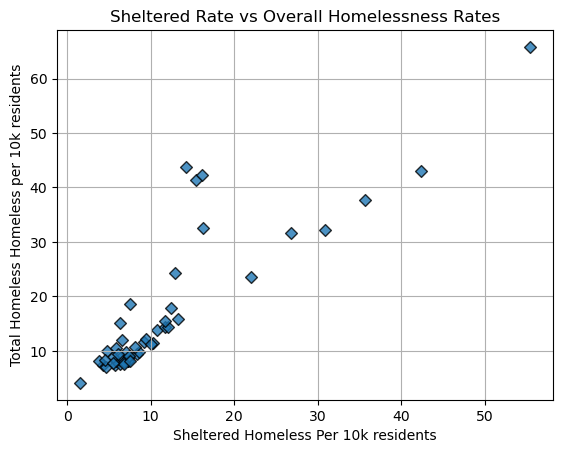

In [19]:
# Create scatter plot showing relationship scores between sheltered homeless population rate 
# and total homeless population rate


plt.scatter(     
    homeless_reduced["ShelteredPer10k"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Sheltered Rate vs Overall Homelessness Rates")
plt.xlabel("Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

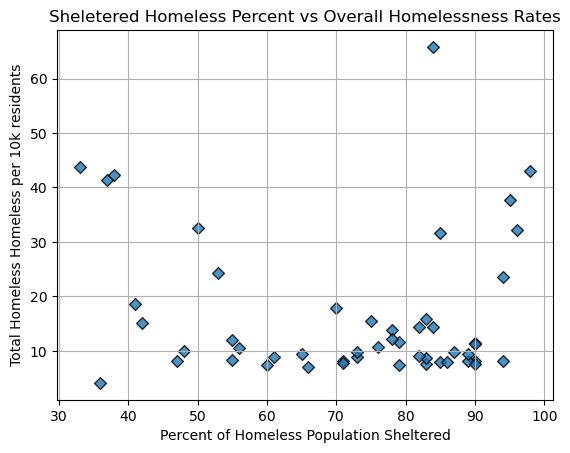

In [20]:
# Create scatter plot showing relationship scores between sheltered percent of homeless population
# and total homeless population rate


plt.scatter(     
    homeless_reduced["percent population sheltered"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Sheletered Homeless Percent vs Overall Homelessness Rates")
plt.xlabel("Percent of Homeless Population Sheltered")
plt.ylabel("Total Homeless Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

In [21]:
# Regression analysis for each of the pairs below.

# Define a function
def plot_linear_regression(x_values, y_values, x_axis, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

The r-squared value is: nan
The r value is: nan
The p value is: nan


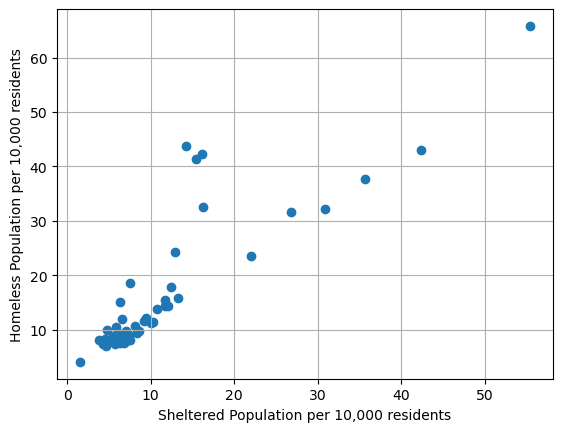

In [12]:
# Linear regression on Per10Residents Homeless compared to Restrictiveness Score
x_values = homeless_reduced["ShelteredPer10k"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Sheltered Population per 10,000 residents", "Homeless Population per 10,000 residents", (6,-10))

The r-squared value is: nan
The r value is: nan
The p value is: nan


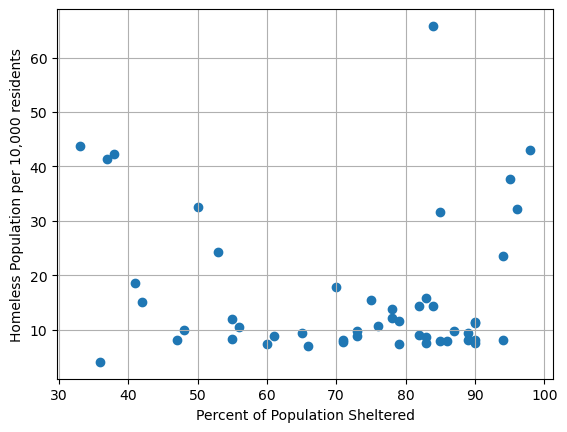

In [22]:
# Linear regression on Per10Residents Homeless compared to Restrictiveness Score
x_values = homeless_reduced["percent population sheltered"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Percent of Population Sheltered", "Homeless Population per 10,000 residents", (6,-10))